In [1]:
import os
from utils.experiment import *
from utils.transforms import *

In [ ]:
test = Experiment(
    "Test",
    transform=[
        Resize((64, 128)),
        ToTensor(),
    ],
    hparams=HParams(num_trainings=1),
)
test.run()


In [ ]:
Experiment.reevaluate("2022-05-30_08-42-10_Baseline")

torch.Size([1000, 1, 128, 64])


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


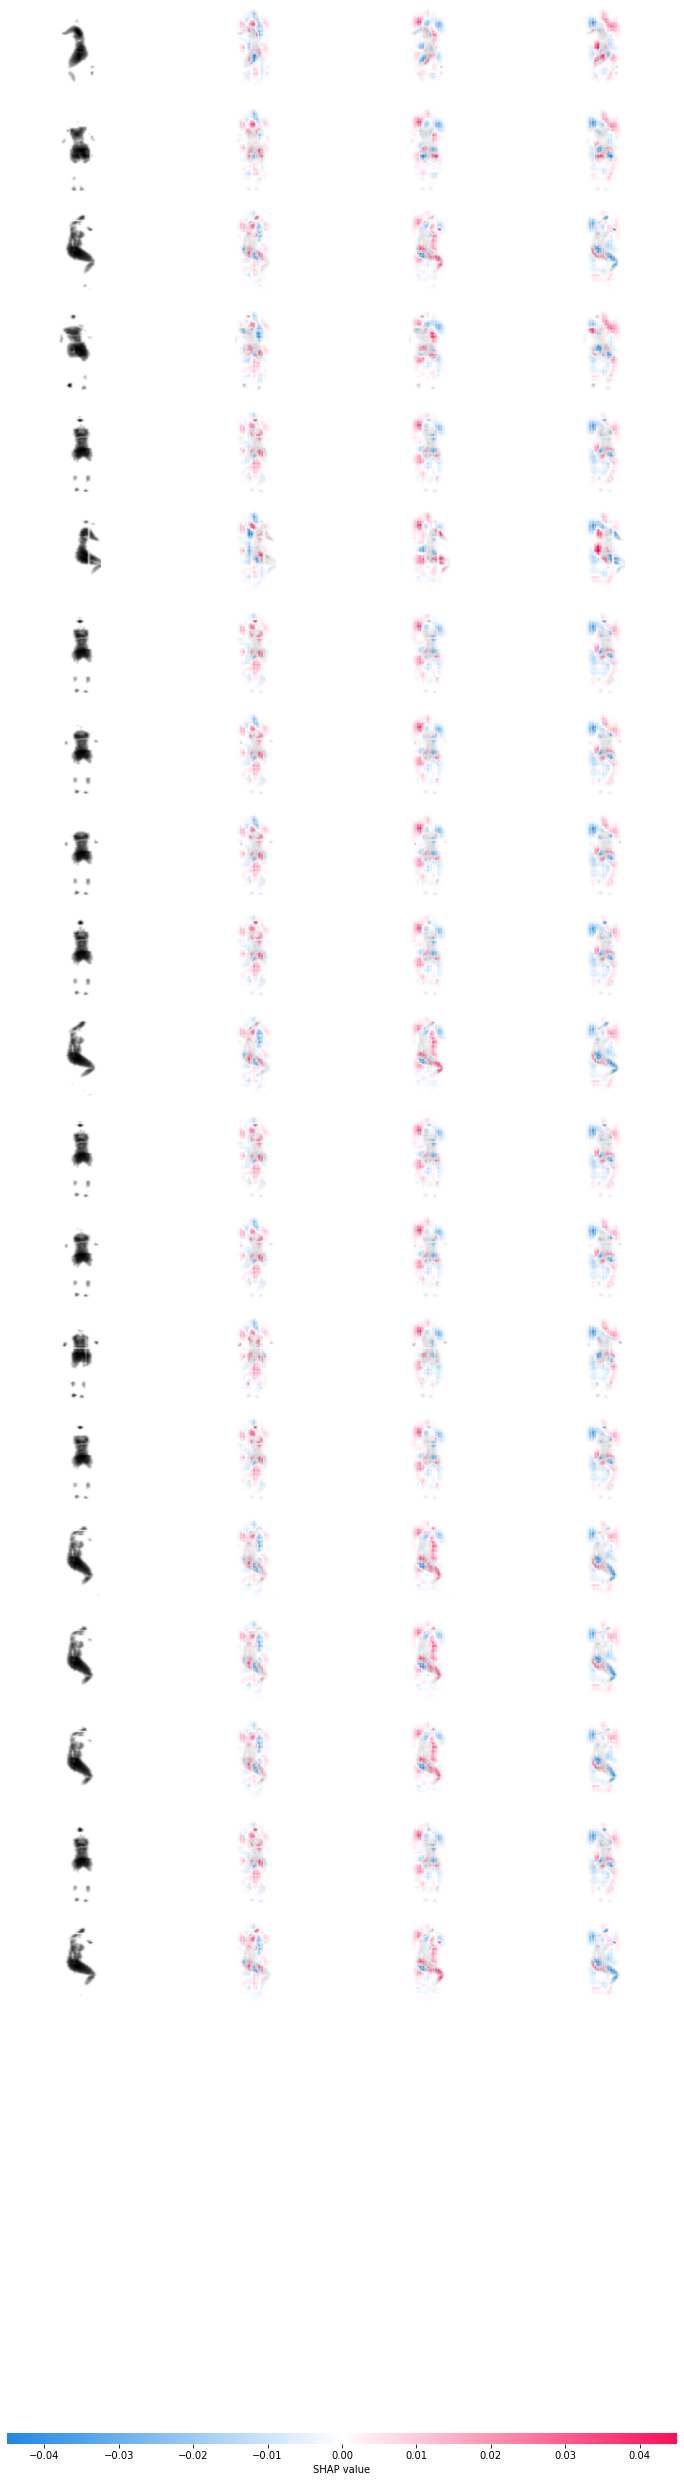

In [2]:
Experiment.explain("2022-06-22_18-32-02_Baseline")

In [ ]:
dirs = os.listdir("runs")
for run in dirs:
    Experiment.reevaluate(run)